In [1]:
from bs4 import BeautifulSoup
import urllib.request
import re
import requests
import pandas as pd
import numpy as np
import random 
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from tqdm import tqdm_notebook

In [172]:
#create a new list for urls
all_urls=[]
#run through pages
for x in tqdm_notebook(range(180,240)):
    driver = webdriver.Chrome('./chromedriver.exe')
    
    #go to page x and get html
    driver.get(f'https://www.autotrader.ca/cars/on/?rcp=100&rcs={x*100-100}&srt=9&yRng=2013%2C&prx=-2&prv=Ontario&loc=ontario&hprc=True&wcp=True&sts=Used&showcpo=1&adtype=Dealer&inMarket=advancedSearch')
    html=driver.page_source
    main_soup = BeautifulSoup(html,'lxml')
    
    #get all listing cards from current page
    listing_details =main_soup.find_all('a',class_='result-title click')
    
    #get url from each listing card
    for x in listing_details:
        href=x['href']
        #format the url
        website=f'https://www.autotrader.ca/{href}'
        all_urls.append(website)
    
    #close chrome driver to to avoid being banned
    driver.close()
   

<ipython-input-172-c720e896fc00>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(180,240)):


In [174]:
#remove duplicate urls
all_urls=list(set(all_urls))

In [180]:
#check length
len(all_urls)

3668

In [177]:
#write current list of url to disk as a '.txt' file with each line being a url
with open('all_urls_page180-240.txt', 'w') as f:
    for item in all_urls:
        f.write("%s\n" % item)

In [178]:
#in case read url is required
with open('all_urls_page180-240.txt') as f:
    new_urls = f.readlines()
all_urls = new_urls.copy()

In [184]:
all_car_info=[]
driver = webdriver.Chrome('./chromedriver.exe')

for url in tqdm_notebook(all_urls):
    driver.get(url)
    time.sleep(0.5)
    single_car_html=driver.page_source
    single_car_soup = BeautifulSoup(single_car_html,'lxml')
    
    try:
        ad_ids = url.split('/')[9].split('_')[1]
    except:
        ad_ids = 'missing'
    try:
        years = single_car_soup.find('p',class_='hero-title').get_text().split(' ')[0]
    except:
        years = 'missing'
    try:
        makes = single_car_soup.find('p',class_='hero-title').get_text().split(' ')[1]
    except:
        makes = 'missing'
    try:
        models = single_car_soup.find('p',class_='hero-title').get_text().split(' ')[2]
    except:
        models = 'missing'
    try:
        prices = single_car_soup.find('p',class_='hero-price').get_text().replace(',','')
    except:
        prices = 'missing'
    try:
        mileages = single_car_soup.find('p',id='vdp-hl-mileage').get_text().split(' ')[0].replace(',','')
    except:
        mileages = 'missing'
    try:
        locations = single_car_soup.find('p',class_='hero-location').get_text(strip = True).split('|')[1].replace(' ','')
    except:
        locations = 'missing'
    try:
        transmission=single_car_soup.find('p',id='vdp-hl-transmission').get_text()
    except:
        transmission='missing'
    try:
        drivetrain=single_car_soup.find('p',id='vdp-hl-drivetrain').get_text()
    except:
        drivetrain='missing'
    try:
        body_type=single_car_soup.find('span',id='spec-value-3').strong.get_text()
    except:
        body_type='missing'
    try:
        colour=single_car_soup.find('span',id='spec-value-9').strong.get_text()
    except:
        colour='missing'
    try:
        fuel_type=single_car_soup.find('span',id='spec-value-12').strong.get_text()
    except:
        fuel_type='missing'
    try:
        fuel_economy=single_car_soup.find('div',class_='fuel-value').get_text()
    except:
        fuel_economy='missing'
    try:
        price_deltas=single_car_soup.find('div',class_='hero-badge-wrapper').get_text()\
                    .split(' ')[0].split('$')[1].replace(',','')
    except:
        price_deltas = 'missing'
    try:
        moreless = single_car_soup.find('div',class_='hero-badge-wrapper').get_text()\
                   .split(' ')[1]
    except:
        moreless = 'missing'
    
    all_car_info.append({'year':years,
                         'make':makes,
                         'model':models,
                         'adid':ad_ids,
                         'price':prices,
                         'mileage':mileages,
                         'location':locations,
                         'transmission':transmission,
                         'drivetrain':drivetrain,
                         'body_type':body_type,
                         'colour':colour,
                         'fuel_type':fuel_type,
                         'fuel_economy':fuel_economy,
                         'price_delta':price_deltas,
                         'more_less':moreless
                        })
#Build a DataFrame 
df_scraped = pd.DataFrame(all_car_info) 
#Save the DataFrame to disk when it's done
df_scraped.to_csv('autotrader_scraped_page180-240.csv', encoding='utf-8')

<ipython-input-184-3170a79dfd90>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for url in tqdm_notebook(all_urls):


In [183]:
#Quickly check the data scraped
df_scraped = pd.DataFrame(all_car_info)         
df_scraped.head(20)

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_type,fuel_economy,price_delta,more_less
0,2018,Chevrolet,Equinox,49463063,28995,27331,Napanee,6 Speed Automatic,AWD,SUV,Cajun Red Tintcoat,9.8L/100km,8.9,884,BELOW
1,2020,Honda,Accord,49496947,39995,1264,Stouffville,10 Speed Automatic,FWD,Sedan,Red,Gas,9.0,1021,BELOW
2,2014,Honda,Odyssey,49477216,18887,111883,Kitchener,Automatic,FWD,Minivan,Grey,Gas,9.2,missing,missing
3,2016,Dodge,Journey,49464876,15495,97141,Exeter,4 Speed Automatic,FWD,SUV,Granite Crystal Metallic,12.7L - 14.2L/100km,11.6,998,BELOW
4,2016,Land,Rover,49499447,54888,100357,Waterloo,8 Speed Automatic,4x4,5.0L 8cyl,Black,missing,missing,10518,BELOW


In [ ]:
df_scraped.to_csv('autotrader_scraped_page180-240.csv', encoding='utf-8')

### Combine Tables


In [409]:
with open('all_urls_page40-79.txt') as f:
    new_urls = f.readlines()
all_urls_page40_79 = new_urls.copy()

with open('all_urls_page120-159.txt') as f:
    new_urls = f.readlines()
all_urls_page120_159 = new_urls.copy()



In [271]:
df1_page40_79 = pd.read_csv('autotrader_scraped_page40-79.csv')
df1_page120_159 = pd.read_csv('autotrader_scraped_page120-159.csv')
df1_page180_240= pd.read_csv('autotrader_scraped_page180-240.csv')

In [189]:
#insert ad ids from url list
df1_page40_79['adid']=[row.split('/')[9].split('_')[1] for row in all_urls_page40_79]
df1_page120_159['adid']=[row.split('/')[9].split('_')[1] for row in all_urls_page120_159]

In [297]:
df1_page40_79.to_csv('autotrader_scraped_page40-79.csv', encoding='utf-8')
df1_page120_159.to_csv('autotrader_scraped_page120-159.csv', encoding='utf-8')

In [410]:
#concate tables
df1 = pd.concat([df1_page40_79, df1_page120_159,df1_page180_240])

In [412]:
#Drop Index
df1.reset_index(drop=True, inplace=True)

In [417]:
df1.head()

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_economy,price_delta,more_less
0,2017,Infiniti,QX30,49667893,24788.0,34313,Thornhill,7 Speed Automatic,FWD,Wagon,Gas,8.5,1722.0,ABOVE
1,2014,Mercedes-Benz,C-Class,49666761,17498.0,82109,Kitchener,7 Speed Automatic,AWD,Sedan,Black,NaN,694.0,BELOW
2,2016,Honda,Odyssey,49647361,27888.0,55919,Concord,Automatic,FWD,Minivan,Obsidian Blue Pearl,10.6,963.0,ABOVE
3,2015,Kia,Soul,49676108,13880.0,81240,Toronto,6 Speed Automatic,FWD,Hatchback,Grey,9.0,NaN,missing
4,2019,Honda,Civic,49641921,22395.0,34128,Toronto,CVT,FWD,Sedan,Crystal Black Pearl,7.1,847.0,BELOW


In [ ]:
#Fix/replace the index
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df1.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df1.drop(['fuel_type'], axis=1, inplace=True)
df1.drop_duplicates(subset=['adid'],inplace=True)

In [566]:
# Save a copy of combined table
df1.to_csv('autotrader_scraped10182020.csv', encoding='utf-8')

In [2]:
df1= pd.read_csv('autotrader_scraped10182020.csv',index_col=0)

In [ ]:
#Reassign index
df1.index = range(len(df1.index))

In [5]:
df1.shape

(11657, 14)

In [6]:
df1['adid'].nunique()

11657

In [514]:
df1['make']=df1['make'].astype(str)
df1['model']=df1['model'].astype(str)
df1['location']=df1['location'].astype(str)
df1['transmission']=df1['transmission'].astype(str)
df1['drivetrain']=df1['drivetrain'].astype(str)
df1['body_type']=df1['body_type'].astype(str)
df1['colour']=df1['colour'].astype(str)
df1['more_less']=df1['more_less'].astype(str)
df1['mileage']=df1['mileage'].astype(float)

In [573]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11657 entries, 0 to 11656
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          11490 non-null  float64
 1   make          11490 non-null  object 
 2   model         11657 non-null  object 
 3   adid          11657 non-null  int64  
 4   price         11490 non-null  float64
 5   mileage       11490 non-null  float64
 6   location      11657 non-null  object 
 7   transmission  11490 non-null  object 
 8   drivetrain    11032 non-null  object 
 9   body_type     10695 non-null  object 
 10  colour        6296 non-null   object 
 11  fuel_economy  9580 non-null   float64
 12  price_delta   9051 non-null   float64
 13  more_less     11657 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.3+ MB


In [522]:
df1.head(10)

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_economy,price_delta,more_less
0,2017.0,Infiniti,QX30,49667893,24788.0,34313.0,Thornhill,Automatic,FWD,Wagon,nan,8.5,1722.0,ABOVE
1,2014.0,Mercedes-Benz,C-Class,49666761,17498.0,82109.0,Kitchener,Automatic,AWD,Sedan,Black,NaN,694.0,BELOW
2,2016.0,Honda,Odyssey,49647361,27888.0,55919.0,Concord,Automatic,FWD,Minivan,nan,10.6,963.0,ABOVE
3,2015.0,Kia,Soul,49676108,13880.0,81240.0,Toronto,Automatic,FWD,Hatchback,Grey,9.0,NaN,missing
4,2019.0,Honda,Civic,49641921,22395.0,34128.0,Toronto,Automatic,FWD,Sedan,Black,7.1,847.0,BELOW
5,2018.0,Nissan,Rogue,49674691,19999.0,23000.0,London,Automatic,FWD,SUV,Black,8.2,NaN,missing
6,2013.0,Dodge,Grand,48850091,11995.0,63456.0,ThunderBay,Automatic,FWD,Minivan,Grey,10.3,2328.0,BELOW
7,2017.0,Jeep,Grand,49663387,31997.0,54544.0,Concord,Automatic,AWD,SUV,Black,NaN,3332.0,ABOVE
8,2016.0,Nissan,370Z,49674484,20995.0,50000.0,Mississauga,Manual,RWD,nan,nan,NaN,NaN,missing
9,2017.0,Audi,A4,49658385,22995.0,81311.0,Mississauga,Automatic,AWD,Sedan,Black,8.9,2119.0,BELOW


In [518]:
df1.make.unique()

array(['Infiniti', 'Mercedes-Benz', 'Honda', 'Kia', 'Nissan', 'Dodge',
       'Jeep', 'Audi', 'Ford', 'Chevrolet', 'Buick', 'Subaru', 'BMW',
       'Mazda', 'Toyota', 'Fiat', 'Lincoln', 'Hyundai', 'Chrysler',
       'Mitsubishi', 'Volkswagen', 'Lexus', 'Jaguar', 'Acura', 'Land',
       'Ram', 'Porsche', 'GMC', 'Tesla', 'Volvo', 'MINI', 'Cadillac',
       'Lamborghini', 'Scion', 'Aston', 'Maserati', 'Alfa', 'Genesis',
       'smart', 'Ferrari', 'McLaren', 'Bentley', 'Rolls-Royce', 'nan',
       'Hino'], dtype=object)

### Data Clean and Categorisation

In [420]:
#Clean the Transmissions column, categorisation
df1['transmission'] = df1['transmission'].map({'7 Speed Automatic':'Automatic', '6 Speed Automatic':'Automatic',\
                                               'CVT':'Automatic', '8 Speed Automatic':'Automatic',\
                                               '6 Speed Manual':'Manual', '9 Speed Automatic':'Automatic',\
                                               '7 Speed Manual':'Manual', '4 Speed Automatic':'Automatic',\
                                               '10 Speed Automatic':'Automatic', 'Not Available':'Missing',\
                                               '5 Speed Automatic':'Automatic', '1 Speed Automatic':'Automatic',\
                                               'Automatic':'Automatic','Manual':'Manual','missing':'Missing',\
                                               '5 Speed Manual':'Manual', '6 Speed Automatic with auto-shift':'Automatic',\
                                               '7 Speed Automatic with auto-shift':'Automatic', '8 Speed Automatic with auto-shift':'missing'})


In [422]:
#Reassign data type
df1['colour']=df1['colour'].astype(str)


In [423]:
#categorize colour names 
df1['colour'] = df1['colour'].map({'Black':'Black', 'White':'White',\
                                   'Grey':'Grey','Gray':'Grey','Blue':'Blue',\
                                   'Silver':'Silver','Red':'Red','Dark Grey':'Grey',\
                                   'Crystal Black Pearl':'Black','Alpine White':'White',\
                                   'Brilliant Black Crystal Pearl':'Black','Shadow Black':'Black',\
                                   'Granite Crystal Metallic':'Grey','Lunar Silver Metallic':'Silver',\
                                   'Gun Metallic':'Grey','Modern Steel Metallic':'Grey','Deep Black Pearl':'Black',\
                                   'Pearl White':'White','White Diamond Pearl':'White','Charcoal':'Black',\
                                   'Ingot Silver Metallic':'Silver','Magnetic Black Metallic':'Black','Summit White':'White',\
                                   'Polar White':'White','Brown':'Brown','Bright White':'White',\
                                   'Midnight Black Metallic':'Black','Pure White':'White','Agate Black':'Black',\
                                   'Burgundy':'Red','Green':'Green','Yellow':'Yellow','Magnetic Metallic':'Grey'})

In [424]:
#Clean the drivetrain column
df1['drivetrain'] = df1['drivetrain'].map({'FWD':'FWD', 'AWD':'AWD',\
                                           '4x4':'AWD', '4WD':'AWD',\
                                           'RWD':'RWD','2WD':'2WD'})
                                  

In [850]:
#Clean the body type column 
df1['body_type'] = df1['body_type'].map({'SUV':'SUV', 'Sedan':'Sedan',\
                                         'Hatchback':'Hatchback', 'Truck':'Truck',\
                                         'Minivan':'Minivan','Coupe':'Coupe',\
                                         'Wagon':'Wagon','Crew Cab':'Truck',\
                                         'Regular Cab':'Truck','Truck Crew Cab':'Truck',\
                                         'Compact':'Sedan','Convertible':'Convertible',\
                                         'Extended Cab':'Truck'})

In [932]:
#Body type column further categorized
df1['body_type'] = df1['body_type'].map({'SUV':'SUV', 'Sedan':'Sedan',\
                                         'Hatchback':'Sedan', 'Truck':'Truck',\
                                         'Minivan':'Minivan','Coupe':'Coupe',\
                                         'Wagon':'Sedan','Crew Cab':'Truck',\
                                         'Regular Cab':'Truck','Truck Crew Cab':'Truck',\
                                         'Compact':'Sedan','Convertible':'Coupe',\
                                         'Extended Cab':'Truck'})

In [934]:
df1['body_type'].unique()

array(['Sedan', 'Minivan', 'SUV', nan, 'Truck', 'Coupe'], dtype=object)

In [ ]:
#Deal with 'missing' values as per column data types
for i in range(len(df1)):
    if df1.loc[i,'price']=='missing':
        df1.loc[i,'price']=np.nan
        
df1['price']=df1['price'].astype(float)

In [279]:
#Deal with 'missing' values as per column data types
for i in range(len(df1)):
    if df1.loc[i,'fuel_economy']=='missing':
        df1.loc[i,'fuel_economy']=np.nan
        
df1['fuel_economy']=df1['fuel_economy'].astype(float)


In [ ]:
#Deal with 'missing' values as per column data types
for i in range(len(df1)):
    if df1.loc[i,'price_delta']=='missing':
        df1.loc[i,'price_delta']=np.nan
        
df1['price_delta']=df1['price_delta'].astype(float)

In [ ]:
#Deal with 'missing' values as per column data types
for i in range(len(df1)):
    if df1.loc[i,'year']=='missing':
        df1.loc[i,'year']=np.nan
        
df1['year']=df1['year'].astype(float)


### Mean Value vs Year (by drivetrain)

In [704]:
df1[df1['drivetrain']=='RWD']['price'].mean()

54439.301449275365

In [705]:
df1[df1['drivetrain']=='AWD']['price'].mean()

32947.372096672945

In [706]:
df1[df1['drivetrain']=='FWD']['price'].mean()

17256.84187340598

In [694]:
df_dt_notna.head(10)

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_economy,price_delta,more_less
0,2017.0,Infiniti,QX30,49667893,24788.0,34313.0,Thornhill,Automatic,FWD,Wagon,NaN,8.5,1722.0,ABOVE
1,2014.0,Mercedes-Benz,C-Class,49666761,17498.0,82109.0,Kitchener,Automatic,AWD,Sedan,Black,NaN,694.0,BELOW
2,2016.0,Honda,Odyssey,49647361,27888.0,55919.0,Concord,Automatic,FWD,Minivan,NaN,10.6,963.0,ABOVE
3,2015.0,Kia,Soul,49676108,13880.0,81240.0,Toronto,Automatic,FWD,Hatchback,Grey,9.0,NaN,missing
4,2019.0,Honda,Civic,49641921,22395.0,34128.0,Toronto,Automatic,FWD,Sedan,Black,7.1,847.0,BELOW
5,2018.0,Nissan,Rogue,49674691,19999.0,23000.0,London,Automatic,FWD,SUV,Black,8.2,NaN,missing
6,2013.0,Dodge,Grand,48850091,11995.0,63456.0,ThunderBay,Automatic,FWD,Minivan,Grey,10.3,2328.0,BELOW
7,2017.0,Jeep,Grand,49663387,31997.0,54544.0,Concord,Automatic,AWD,SUV,Black,NaN,3332.0,ABOVE
8,2016.0,Nissan,370Z,49674484,20995.0,50000.0,Mississauga,Manual,RWD,NaN,NaN,NaN,NaN,missing
9,2017.0,Audi,A4,49658385,22995.0,81311.0,Mississauga,Automatic,AWD,Sedan,Black,8.9,2119.0,BELOW


In [136]:
df_dt_notna=df1[df1['drivetrain'].notna()]
df_dt_notna=df_dt_notna[df_dt_notna['drivetrain']!='2WD']

In [137]:
df_dt_notna['drivetrain'].unique()

array(['FWD', 'AWD', 'RWD'], dtype=object)

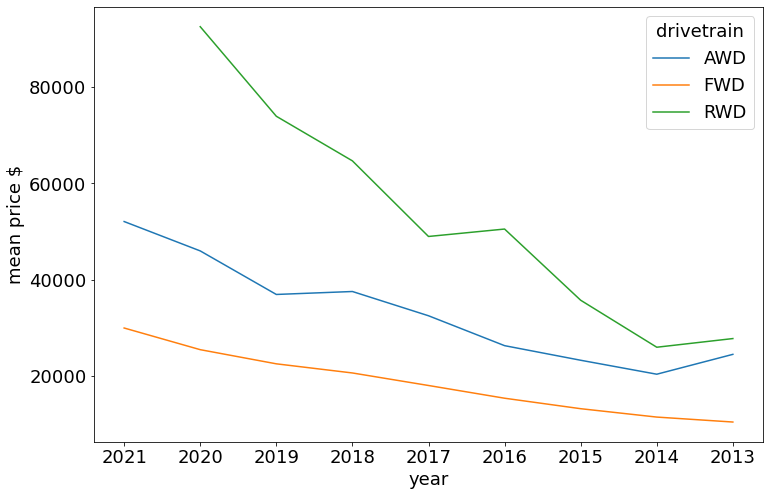

In [144]:
df_dt_notna.groupby(['year','drivetrain'])['price'].mean().unstack().plot(figsize=(12, 8)).invert_xaxis()
plt.ylabel('mean price $')
plt.rc('font', size=18) 

### Mean Value vs Year (by transmission)

In [124]:
df_tr_notna=df1[df1['transmission'].isin(['Automatic','Manual'])]

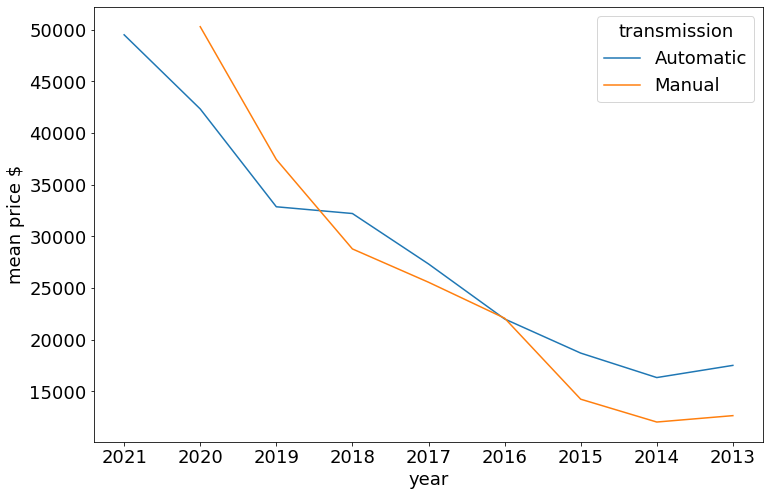

In [143]:
df_tr_notna.groupby(['year','transmission'])['price'].mean().unstack().plot(figsize=(12, 8)).invert_xaxis()
plt.ylabel('mean price $')
plt.rc('font', size=18) 

### Mean Value vs Year (by body type)

In [146]:
# Further categorize body types eg. Hatchback and Wagons are actually Sedans
df1_bodytype_lesstypes=df1
df1_bodytype_lesstypes['body_type'] = df1_bodytype_lesstypes['body_type'].map({'SUV':'SUV', 'Sedan':'Sedan',\
                                         'Hatchback':'Sedan', 'Truck':'Truck',\
                                         'Minivan':'Minivan','Coupe':'Coupe',\
                                         'Wagon':'Sedan','Crew Cab':'Truck',\
                                         'Regular Cab':'Truck','Truck Crew Cab':'Truck',\
                                         'Compact':'Sedan','Convertible':'Coupe',\
                                         'Extended Cab':'Truck'})

In [147]:
df_bt_notna=df1_bodytype_lesstypes[df1_bodytype_lesstypes['body_type'].notna()]

In [148]:
df_bt_notna['body_type'].unique()

array(['Sedan', 'Minivan', 'SUV', 'Truck', 'Coupe'], dtype=object)

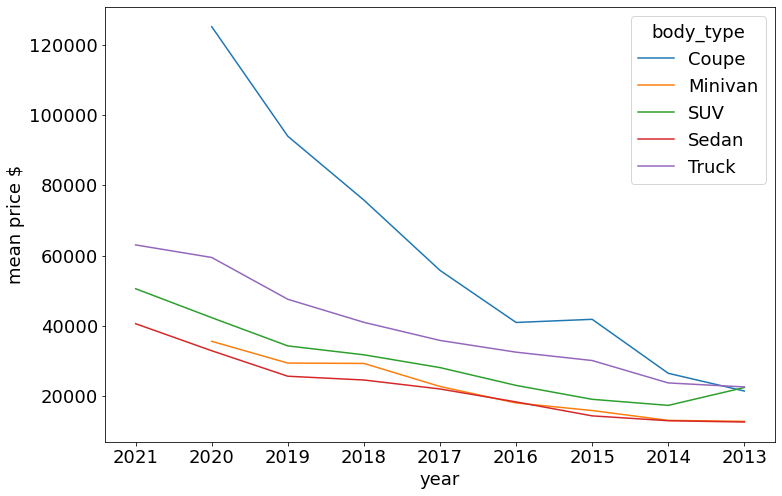

In [149]:
df_bt_notna.groupby(['year','body_type'])['price'].mean().unstack().plot(figsize=(12, 8)).invert_xaxis()
plt.ylabel('mean price $')
plt.rc('font', size=18) 

### Counts by fuel economy

In [150]:
df_fe_notna=df1[df1['fuel_economy'].notna()]

In [151]:
df_fe_notna=df_fe_notna[df_fe_notna['fuel_economy']<20]

Text(0.5, 0, 'L / 100km')

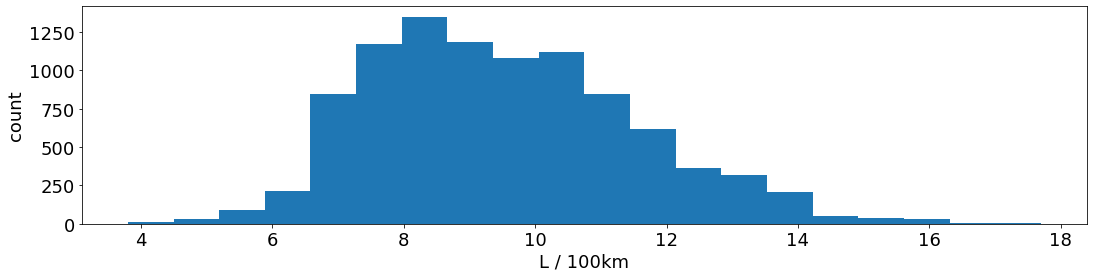

In [155]:
plt.figure(figsize=(18,4))
plt.hist(df_fe_notna['fuel_economy'],bins=20)
plt.ylabel('count')
plt.xlabel('L / 100km')

### Counts by mileage

In [157]:
df_mil_notna=df1[df1['mileage'].notna()]

In [158]:
df_mil_notna_filtered=df_mil_notna[df_mil_notna['mileage']<300000]

Text(0.5, 0, 'km')

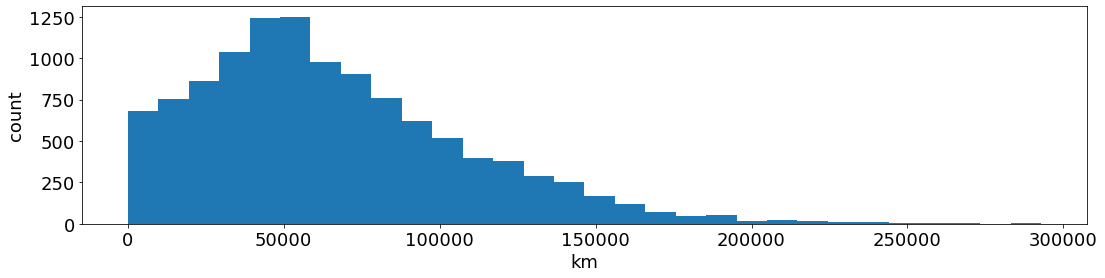

In [159]:
plt.figure(figsize=(18,4))
plt.hist(df_mil_notna_filtered['mileage'],bins=30)
plt.ylabel('count')
plt.xlabel('km')

### Counts by year, Bar Chart and Pie Chart(not used)

In [278]:
df1.head(10)

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_economy,price_delta,more_less
0,2017.0,Infiniti,QX30,49667893,24788.0,34313.0,Thornhill,Automatic,FWD,Sedan,NaN,8.5,1722.0,ABOVE
1,2014.0,Mercedes-Benz,C-Class,49666761,17498.0,82109.0,Kitchener,Automatic,AWD,Sedan,Black,NaN,694.0,BELOW
2,2016.0,Honda,Odyssey,49647361,27888.0,55919.0,Concord,Automatic,FWD,Minivan,NaN,10.6,963.0,ABOVE
3,2015.0,Kia,Soul,49676108,13880.0,81240.0,Toronto,Automatic,FWD,Sedan,Grey,9.0,NaN,missing
4,2019.0,Honda,Civic,49641921,22395.0,34128.0,Toronto,Automatic,FWD,Sedan,Black,7.1,847.0,BELOW
5,2018.0,Nissan,Rogue,49674691,19999.0,23000.0,London,Automatic,FWD,SUV,Black,8.2,NaN,missing
6,2013.0,Dodge,Grand,48850091,11995.0,63456.0,ThunderBay,Automatic,FWD,Minivan,Grey,10.3,2328.0,BELOW
7,2017.0,Jeep,Grand,49663387,31997.0,54544.0,Concord,Automatic,AWD,SUV,Black,NaN,3332.0,ABOVE
8,2016.0,Nissan,370Z,49674484,20995.0,50000.0,Mississauga,Manual,RWD,NaN,NaN,NaN,NaN,missing
9,2017.0,Audi,A4,49658385,22995.0,81311.0,Mississauga,Automatic,AWD,Sedan,Black,8.9,2119.0,BELOW


In [279]:
list_year=[row for row in df1.year.unique().tolist() if ~np.isnan(row)]

In [280]:
list_year.sort()

In [195]:
df_year_notna=df1[df1['year'].notna()]

Text(0.5, 0, 'year')

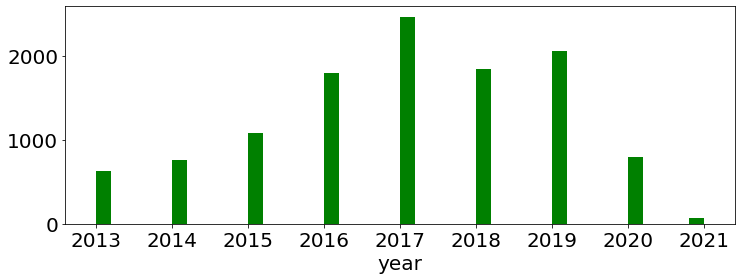

In [204]:
plt.figure(figsize=(12,4))
plt.hist(df_year_notna['year'], bins=40,color='green')
plt.xlabel('year')

Text(0.5, 0, 'count')

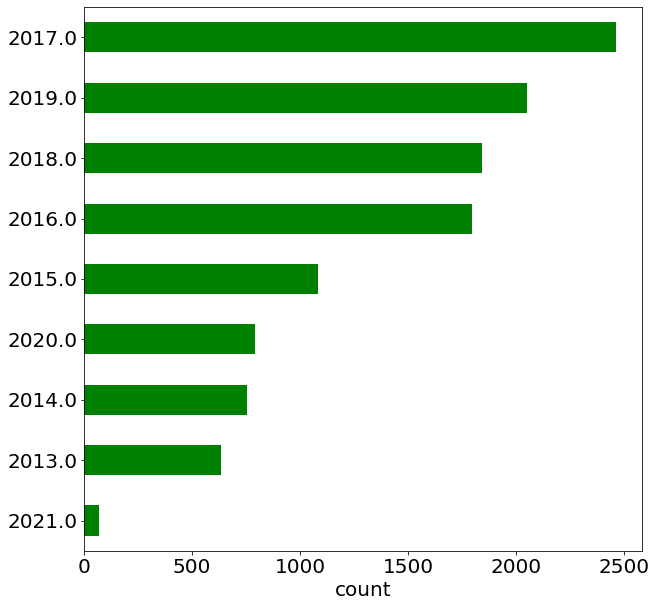

In [178]:
plt.figure(figsize=(10,10))
plt.rc('font', size=20)

df1['year'].value_counts().plot(kind = 'barh', color = 'green').invert_yaxis()
plt.xlabel('count')

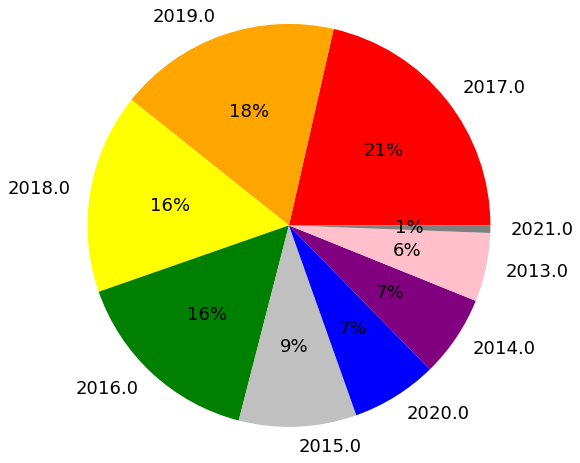

In [343]:
# Data to plot
labels = years_counts.year
sizes = years_counts.counts
colors = ['red','orange','yellow','green','silver','blue','purple','pink','grey']
plt.figure(figsize=(8,8))

# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%',textprops={'fontsize': 18})

plt.axis('equal')
plt.show()

### Counts by transmission, Bar Chart and Pie Chart(not used)

In [170]:
tran_counts=df_tr_notna['transmission'].value_counts().reset_index().rename(columns={'index': 'transmission','transmission':'counts'})

Text(0.5, 0, 'count')

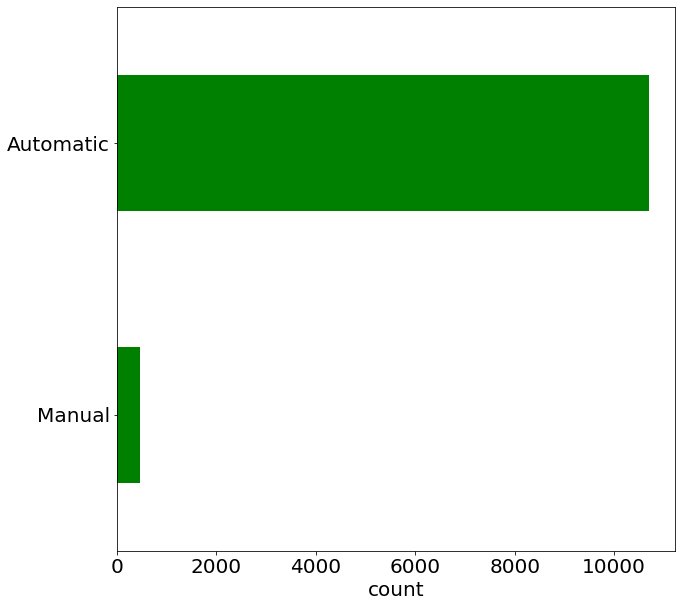

In [179]:
plt.figure(figsize=(10,10))
plt.rc('font', size=20)
df_tr_notna['transmission'].value_counts().plot(kind = 'barh', color = 'green').invert_yaxis()
plt.xlabel('count')

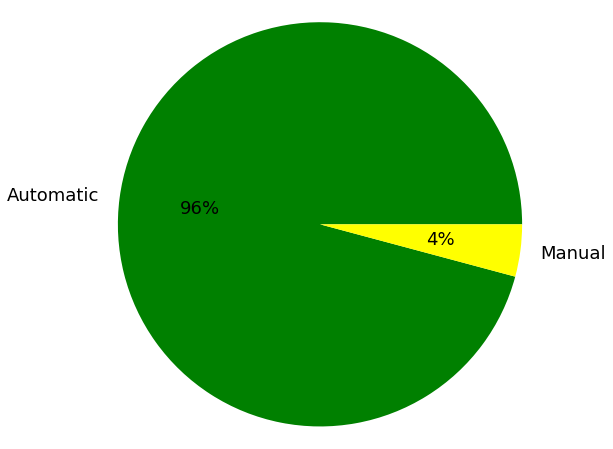

In [342]:
# Data to plot
labels = tran_counts.transmission
sizes = tran_counts.counts
colors = ['green','yellow']
plt.figure(figsize=(8,8))

# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%',textprops={'fontsize': 18})


plt.axis('equal')
plt.show()

### Counts by Body Type, Bar Chart and Pie Chart(not used)

In [ ]:
df_bt_notna

In [304]:
bt_counts=df_bt_notna['body_type'].value_counts().reset_index().rename(columns={'index': 'body_type','body_type':'counts'})

In [305]:
bt_counts

,body_type,counts
0,SUV,4581
1,Sedan,4456
2,Truck,731
3,Minivan,491
4,Coupe,436


Text(0.5, 0, 'count')

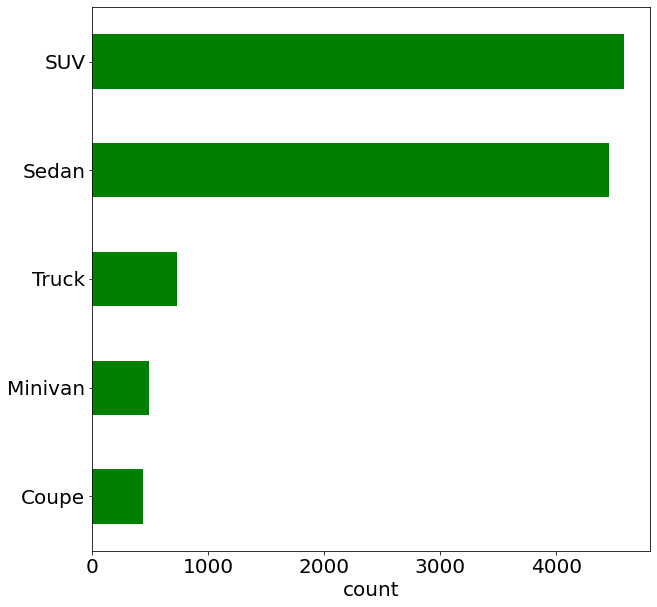

In [181]:
plt.figure(figsize=(10,10))
plt.rc('font', size=20)
df_bt_notna['body_type'].value_counts().plot(kind = 'barh', color = 'green').invert_yaxis()
plt.xlabel('count')

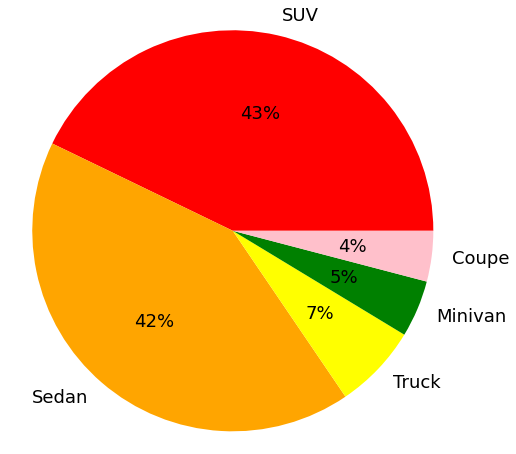

In [341]:
# Data to plot
labels = bt_counts.body_type
sizes = bt_counts.counts
colors = ['red','orange','yellow','green','pink','blue','purple','pink']
plt.figure(figsize=(8,8))


# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%',textprops={'fontsize': 18})


plt.axis('equal')
plt.show()

### Counts by Colour, Bar Chart and Pie Chart(not used)

In [848]:
df1.head(10)

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_economy,price_delta,more_less
0,2017.0,Infiniti,QX30,49667893,24788.0,34313.0,Thornhill,Automatic,FWD,Wagon,NaN,8.5,1722.0,ABOVE
1,2014.0,Mercedes-Benz,C-Class,49666761,17498.0,82109.0,Kitchener,Automatic,AWD,Sedan,Black,NaN,694.0,BELOW
2,2016.0,Honda,Odyssey,49647361,27888.0,55919.0,Concord,Automatic,FWD,Minivan,NaN,10.6,963.0,ABOVE
3,2015.0,Kia,Soul,49676108,13880.0,81240.0,Toronto,Automatic,FWD,Hatchback,Grey,9.0,NaN,missing
4,2019.0,Honda,Civic,49641921,22395.0,34128.0,Toronto,Automatic,FWD,Sedan,Black,7.1,847.0,BELOW
5,2018.0,Nissan,Rogue,49674691,19999.0,23000.0,London,Automatic,FWD,SUV,Black,8.2,NaN,missing
6,2013.0,Dodge,Grand,48850091,11995.0,63456.0,ThunderBay,Automatic,FWD,Minivan,Grey,10.3,2328.0,BELOW
7,2017.0,Jeep,Grand,49663387,31997.0,54544.0,Concord,Automatic,AWD,SUV,Black,NaN,3332.0,ABOVE
8,2016.0,Nissan,370Z,49674484,20995.0,50000.0,Mississauga,Manual,RWD,NaN,NaN,NaN,NaN,missing
9,2017.0,Audi,A4,49658385,22995.0,81311.0,Mississauga,Automatic,AWD,Sedan,Black,8.9,2119.0,BELOW


In [183]:
df_colour_notna=df1[df1['colour'].notna()]

In [184]:
colour_counts=df_colour_notna.colour.value_counts().reset_index().rename(columns={'index':'colour','colour':'counts'})

In [185]:
colour_counts['colour']=colour_counts['colour'].map({'Brown':'Others','Green':'Others','Yellow':'Others','Black':'Black',\
                                                    'White':'White','Grey':'Grey','Silver':'Silver','Blue':'Blue','Red':'Red'})

In [186]:
colour_counts.loc[6,'counts']=colour_counts.loc[6,'counts']+ colour_counts.loc[7,'counts']+colour_counts.loc[8,'counts']


In [187]:
colour_counts.drop([7,8],axis=0,inplace=True)

In [188]:
list_colors=colour_counts.colour.tolist()[:-1]

In [189]:
list_colors.append('Pink')

In [190]:
list_colors

['Black', 'White', 'Grey', 'Silver', 'Blue', 'Red', 'Pink']

Text(0.5, 0, 'count')

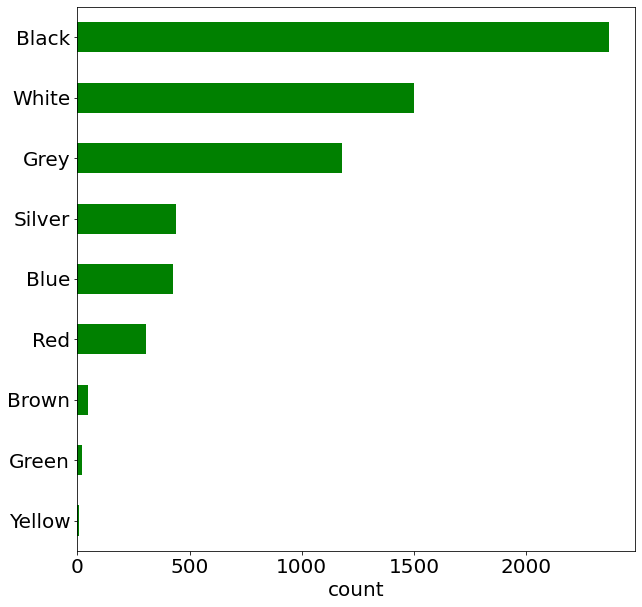

In [191]:
plt.figure(figsize=(10,10))
plt.rc('font', size=20)
df_colour_notna.colour.value_counts().plot(kind = 'barh', color = 'green').invert_yaxis()
plt.xlabel('count')

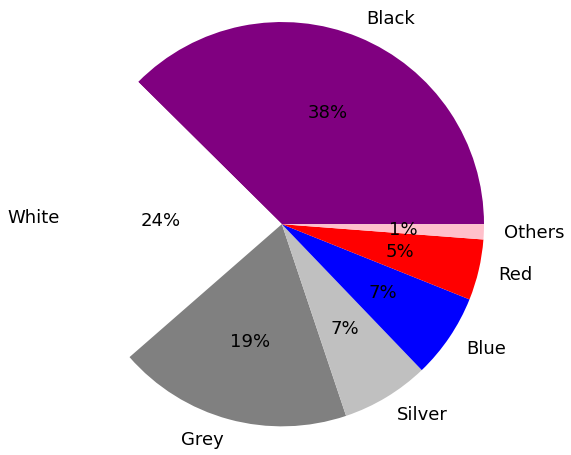

In [344]:
labels = colour_counts.colour
sizes = colour_counts.counts
colors = ['Purple', 'White', 'Grey', 'Silver', 'Blue', 'Red', 'Pink']
plt.figure(figsize=(8,8))


# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%',textprops={'fontsize': 18})


plt.axis('equal')
plt.show()

### Year and Depreciation

In [3]:
df1.head(10)

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_economy,price_delta,more_less
0,2017.0,Infiniti,QX30,49667893,24788.0,34313.0,Thornhill,Automatic,FWD,Wagon,NaN,8.5,1722.0,ABOVE
1,2014.0,Mercedes-Benz,C-Class,49666761,17498.0,82109.0,Kitchener,Automatic,AWD,Sedan,Black,NaN,694.0,BELOW
2,2016.0,Honda,Odyssey,49647361,27888.0,55919.0,Concord,Automatic,FWD,Minivan,NaN,10.6,963.0,ABOVE
3,2015.0,Kia,Soul,49676108,13880.0,81240.0,Toronto,Automatic,FWD,Hatchback,Grey,9.0,NaN,missing
4,2019.0,Honda,Civic,49641921,22395.0,34128.0,Toronto,Automatic,FWD,Sedan,Black,7.1,847.0,BELOW
5,2018.0,Nissan,Rogue,49674691,19999.0,23000.0,London,Automatic,FWD,SUV,Black,8.2,NaN,missing
6,2013.0,Dodge,Grand,48850091,11995.0,63456.0,ThunderBay,Automatic,FWD,Minivan,Grey,10.3,2328.0,BELOW
7,2017.0,Jeep,Grand,49663387,31997.0,54544.0,Concord,Automatic,AWD,SUV,Black,NaN,3332.0,ABOVE
8,2016.0,Nissan,370Z,49674484,20995.0,50000.0,Mississauga,Manual,RWD,NaN,NaN,NaN,NaN,missing
9,2017.0,Audi,A4,49658385,22995.0,81311.0,Mississauga,Automatic,AWD,Sedan,Black,8.9,2119.0,BELOW


In [41]:
df_price_notna=df1[df1['price'].notna()]

In [205]:
df_price_notna.shape

(11490, 14)

In [42]:
df_top20= df_price_notna.model.value_counts().head(20).reset_index().rename(columns={'index':'model','model':'count'})

In [43]:
df_top20

,model,count
0,Civic,471
1,Grand,360
2,Rogue,349
3,Escape,283
4,Elantra,274
5,Corolla,265
6,CR-V,244
7,1500,240
8,RAV4,235
9,Cruze,213


In [44]:
list_modelprice_2019=[]

In [45]:
for x in df_top20.model:
    price = df_price_notna[(df_price_notna['model']==x) & (df_price_notna['year']==2019)]['price'].mean()
    list_modelprice_2019.append(price)

In [46]:
df_top20['price2019']=list_modelprice_2019

In [47]:
list_modelprice_2015=[]

In [48]:
for x in df_top20.model:
    price = df_price_notna[(df_price_notna['model']==x) & (df_price_notna['year']==2015)]['price'].mean()
    list_modelprice_2015.append(price)

In [49]:
df_top20['price2015']=list_modelprice_2015

In [50]:
df_top20['pricedrop/year']=(df_top20['price2019']-df_top20['price2015'])/4

In [51]:
df_top20=df_top20.set_index('model')

In [84]:
df_top20['pricedrop/year'].index

Index(['Civic', 'Grand', 'Rogue', 'Escape', 'Elantra', 'Corolla', 'CR-V',
       '1500', 'RAV4', 'Cruze', 'F-150', 'Santa', 'Edge', 'Tucson', 'Jetta',
       'Cherokee', 'Golf', 'Tiguan', 'Mazda3', 'Camry'],
      dtype='object', name='model')

<ipython-input-97-41cf98a5d22f>:15: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc="best",bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)


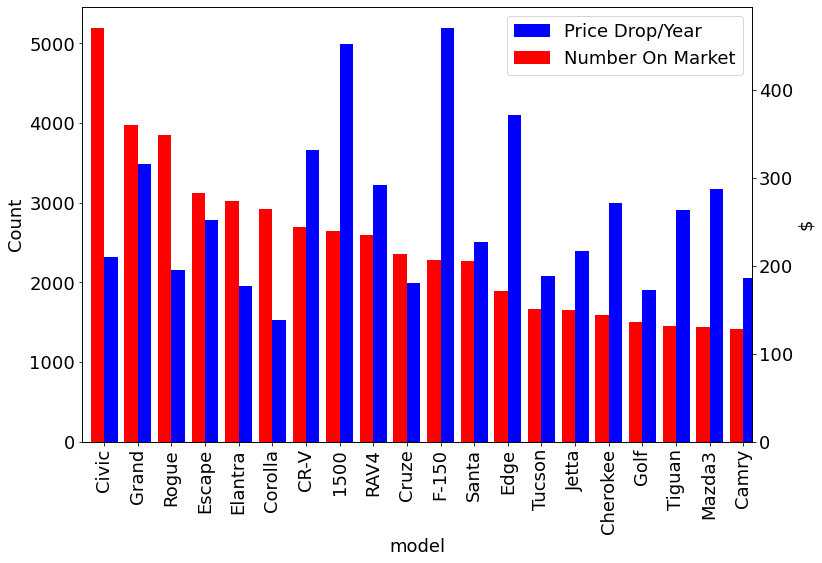

In [97]:
fig = plt.figure(figsize=(12, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

lns1 = df_top20['pricedrop/year'].plot(kind='bar', color='blue', ax=ax, width=width, position=0, label='Price Drop/Year')
lns2 = df_top20['count'].plot(kind='bar', color='red', ax=ax2, width=width, position=1, label='Number On Market')
ax.set_ylabel('Count')
ax2.set_ylabel('$')
plt.rc('font', size=18) 
# ax.legend(loc='best')
# ax2.legend(loc='best')
fig.legend(loc="best",bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.show()

### Mileage and Depreciation

In [53]:
df_mil_notna_rounded=df_mil_notna

In [54]:
df_mil_notna_rounded['mileage']=round(df_mil_notna_rounded['mileage'],-4)

<ipython-input-54-9845d58589d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mil_notna_rounded['mileage']=round(df_mil_notna_rounded['mileage'],-4)


In [55]:
df_mil_notna_rounded.head(10)

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_economy,price_delta,more_less
0,2017.0,Infiniti,QX30,49667893,24788.0,30000.0,Thornhill,Automatic,FWD,Wagon,NaN,8.5,1722.0,ABOVE
1,2014.0,Mercedes-Benz,C-Class,49666761,17498.0,80000.0,Kitchener,Automatic,AWD,Sedan,Black,NaN,694.0,BELOW
2,2016.0,Honda,Odyssey,49647361,27888.0,60000.0,Concord,Automatic,FWD,Minivan,NaN,10.6,963.0,ABOVE
3,2015.0,Kia,Soul,49676108,13880.0,80000.0,Toronto,Automatic,FWD,Hatchback,Grey,9.0,NaN,missing
4,2019.0,Honda,Civic,49641921,22395.0,30000.0,Toronto,Automatic,FWD,Sedan,Black,7.1,847.0,BELOW
5,2018.0,Nissan,Rogue,49674691,19999.0,20000.0,London,Automatic,FWD,SUV,Black,8.2,NaN,missing
6,2013.0,Dodge,Grand,48850091,11995.0,60000.0,ThunderBay,Automatic,FWD,Minivan,Grey,10.3,2328.0,BELOW
7,2017.0,Jeep,Grand,49663387,31997.0,50000.0,Concord,Automatic,AWD,SUV,Black,NaN,3332.0,ABOVE
8,2016.0,Nissan,370Z,49674484,20995.0,50000.0,Mississauga,Manual,RWD,NaN,NaN,NaN,NaN,missing
9,2017.0,Audi,A4,49658385,22995.0,80000.0,Mississauga,Automatic,AWD,Sedan,Black,8.9,2119.0,BELOW


In [56]:
df_mil_notna_rounded['mileage'].value_counts()

50000.0     1343
40000.0     1173
60000.0     1104
30000.0      971
70000.0      936
80000.0      863
20000.0      852
10000.0      640
90000.0      639
100000.0     570
110000.0     426
0.0          414
120000.0     405
130000.0     295
140000.0     267
150000.0     187
160000.0     127
170000.0      70
190000.0      54
180000.0      49
210000.0      24
200000.0      22
220000.0      17
240000.0      10
230000.0       9
260000.0       7
250000.0       7
290000.0       4
270000.0       3
280000.0       1
360000.0       1
Name: mileage, dtype: int64

In [57]:
list_modelprice_hi_mil=[]

In [58]:
for x in df_top20.index:
    price = df_mil_notna_rounded[(df_mil_notna_rounded['model']==x) & (df_mil_notna_rounded['mileage']==100000)]['price'].mean()
    list_modelprice_hi_mil.append(price)

In [59]:
df_top20['price_100000km']=list_modelprice_hi_mil

In [60]:
list_modelprice_low_mil=[]

In [61]:
for x in df_top20.index:
    price = df_mil_notna_rounded[(df_mil_notna_rounded['model']==x) & (df_mil_notna_rounded['mileage']==20000)]['price'].mean()
    list_modelprice_low_mil.append(price)

In [63]:
df_top20['price_20000km']=list_modelprice_low_mil

In [65]:
df_top20['pricedrop/10000km']=(df_top20['price_20000km']-df_top20['price_100000km'])/8

In [67]:
df_top20

,count,price2019,price2015,pricedrop/year,price_100000km,price_20000km,pricedrop/10000km
model,,,,,,,
Civic,471,22044.106061,12781.325581,2315.695120,15387.650000,21142.550000,719.362500
Grand,360,31012.736842,17081.659091,3482.769438,17626.500000,35452.625000,2228.265625
Rogue,349,23914.842105,15316.324324,2149.629445,14675.000000,26801.428571,1515.803571
Escape,283,25703.882353,14595.250000,2777.158088,16011.888889,26387.115385,1296.903312
Elantra,274,18139.656250,10343.823529,1948.958180,12281.750000,18298.600000,752.106250
Corolla,265,19270.729167,13169.441176,1525.321998,13976.888889,18715.857143,592.371032
CR-V,244,31736.181818,17078.333333,3664.462121,20529.055556,30243.125000,1214.258681
1500,240,44562.924528,24609.434783,4988.372436,29595.733333,45391.238095,1974.438095
RAV4,235,30426.138889,17544.285714,3220.463294,18245.181818,31489.714286,1655.566558


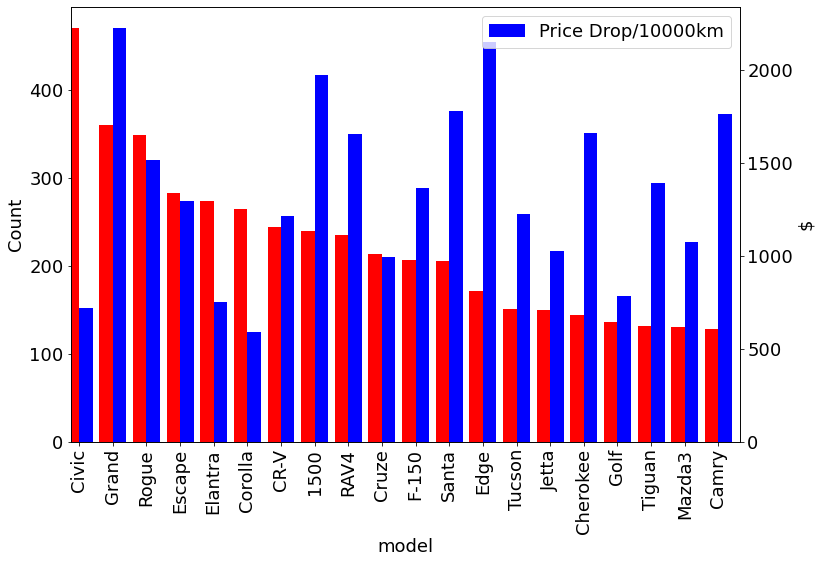

In [69]:
fig = plt.figure(figsize=(12, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df_top20['count'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_top20['pricedrop/10000km'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label='Price Drop/10000km')

ax.set_ylabel('Count')
ax2.set_ylabel('$')
plt.rc('font', size=18) 
plt.legend()
plt.show()

### Location and Model

In [164]:
df1.head(10)

,year,make,model,adid,price,mileage,location,transmission,drivetrain,body_type,colour,fuel_economy,price_delta,more_less
0,2017.0,Infiniti,QX30,49667893,24788.0,34313.0,Thornhill,Automatic,FWD,Wagon,NaN,8.5,1722.0,ABOVE
1,2014.0,Mercedes-Benz,C-Class,49666761,17498.0,82109.0,Kitchener,Automatic,AWD,Sedan,Black,NaN,694.0,BELOW
2,2016.0,Honda,Odyssey,49647361,27888.0,55919.0,Concord,Automatic,FWD,Minivan,NaN,10.6,963.0,ABOVE
3,2015.0,Kia,Soul,49676108,13880.0,81240.0,Toronto,Automatic,FWD,Hatchback,Grey,9.0,NaN,missing
4,2019.0,Honda,Civic,49641921,22395.0,34128.0,Toronto,Automatic,FWD,Sedan,Black,7.1,847.0,BELOW
5,2018.0,Nissan,Rogue,49674691,19999.0,23000.0,London,Automatic,FWD,SUV,Black,8.2,NaN,missing
6,2013.0,Dodge,Grand,48850091,11995.0,63456.0,ThunderBay,Automatic,FWD,Minivan,Grey,10.3,2328.0,BELOW
7,2017.0,Jeep,Grand,49663387,31997.0,54544.0,Concord,Automatic,AWD,SUV,Black,NaN,3332.0,ABOVE
8,2016.0,Nissan,370Z,49674484,20995.0,50000.0,Mississauga,Manual,RWD,NaN,NaN,NaN,NaN,missing
9,2017.0,Audi,A4,49658385,22995.0,81311.0,Mississauga,Automatic,AWD,Sedan,Black,8.9,2119.0,BELOW


In [111]:
list_top20_locations=df1['location'].value_counts().head(20).index.tolist()

In [160]:
len(list_top20_locations)

20

In [182]:
df1_top20_locations=df1[df1['location'].isin(list_top20_locations)]

In [ ]:
pd.DataFrame(df1_top20_locations.groupby(['location','model']).size()).sort_values(['location',0],ascending=False).head(50)

In [183]:
df1_top20_locations_top3_models=df1_top20_locations.groupby(['location','model'])\
                                .size().reset_index().rename(columns={0:'count'})

In [185]:
df1_top20_locations_top3_models['ranking']=df1_top20_locations_top3_models\
                                           .groupby(['location'])['count']\
                                           .rank("dense", ascending=False)

In [186]:
df1_top20_locations_top3_models_sorted=df1_top20_locations_top3_models[df_temp['ranking'].isin([1,2,3])]

In [187]:
df1_top20_locations_top3_models_sorted=df1_top20_locations_top3_models_sorted\.drop([271,476,465,442,454,514,536,1006,1293,1592,1591,1631,1651,1700,1747,1689,2043]).head(60)

In [188]:
df1_top20_locations_top3_models_sorted=df1_top20_locations_top3_models_sorted\
                                       .pivot(index="location", columns="ranking",values="model")

In [202]:
df1_top20_locations_top3_models_sorted

ranking,1.0,2.0,3.0
location,,,
Brampton,Civic,Jetta,Rogue
Brantford,Rogue,Cruze,Corolla
Burlington,Santa,Grand,Rogue
Guelph,Fusion,Santa,Tucson
Hamilton,Elantra,1500,Tucson
Kingston,Escape,F-150,Cherokee
Kitchener,Elantra,Civic,Corolla
London,Civic,Escape,Corolla
Markham,Civic,RAV4,S60
